# Titanic Dataset

Assignment:CS sumbimtted by Charu Saxena A20378393

# Data Description

DataSet OverView: This dataset is about the infamous event happened on April 15, 1912, wrecking of ship Titanic  which took 1502 lives out of 2224. This dataset is about the complete analysis of what sorts of people were likely to survive. In particular, we  are asked  to apply the tools of machine learning to predict which passengers survived the tragedy.We are provided with training dataset.

Number of Instances: 891 entries, 0 to 890

Number of Features:11 and one target class(Survived)


Data Dictionary

    Variable	Definition	Key

    survival	Survival	0 = No, 1 = Yes
     pclass	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
     Thare are also some are missing information in the form of Nan

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Reference: https://www.kaggle.com/c/titanic/data

In [1]:
import csv
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Import Data

Data is present in .csv format so is read in that format using pandas.

In [2]:
data = pd.read_csv ("/Users/charusaxena/downloads/Titanic/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 The following steps removes the features that won't make much difference on the prediction of the survival of the passenger. Here features removed are useing del data[featurename]:

'PassengerId'- This is beacuse this it is unique for every passenger so taking this is as one of the feature in nodes will complicate the tree and the tree generate wont make much sense even if the purity will be highest.

'Name'- This feature has the same reason as 'PassengerId' as all will be unique.

'Ticket'- This feature wont make much difference as we are considering the pClass which will provide similar prediction.

'Cabin'- This feature mostly correlates with pclass, looking at the data (that isn't blank), pclass roughly matches the decks (makes sense): first class had the top decks (A-E), second class (D-F), and third class (E-G). It also makes sense that the people towards the top (higher decks, higher pclass) more likely survived, because they were closer to the lifeboats. Also, most of the values are Nan values(ref:https://www.kaggle.com/c/titanic/discussion/4693)

Also, for the features 'Embarked' and 'Sex' the string formats are changed to numeric.

Then we fill the Nan values in 'Age' with mode of the ages because mode will provide the most commonly aged people on ship. Also, removing all Nan values will cut off around 100 instances which is not feasible.


In [3]:
del data['PassengerId']
del data['Name']
del data['Cabin']
del data['Ticket']
data['Embarked'] = data['Embarked'].map(lambda x : 0 if x =='S' else (1 if x=='Q' else 2))
data['Sex'] =data['Sex'].map(lambda x : 0 if x =='male' else 1)

data["Age"].fillna(data['Age'].mean(),inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


making a features dataframe

In [4]:
features = data.copy()
del features['Survived']

# Decision trees for depth=1

In [5]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

In [6]:
from sklearn.model_selection import train_test_split
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.33)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(596, 7) (596,)
(295, 7) (295,)


testing on Training data

In [7]:
lm = DecisionTreeClassifier(max_depth=1)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)

accuracy 0.805369


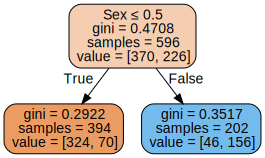

In [8]:
print ("accuracy %2f" % model.score(X_train,y_train))
#print (precision_recall_fscore_support(data['Survived'],predict))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

testing test data

accuracy 0.749153


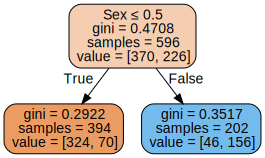

In [9]:
lm = DecisionTreeClassifier(max_depth=1)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)

print ("accuracy %2f" % model.score(X_test,y_test))
#print (precision_recall_fscore_support(data['Survived'],predict))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

test data set

# Decision trees for depth=2

testing train data

accuracy 0.813758


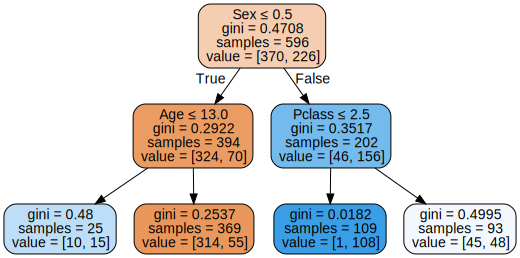

In [10]:
lm = DecisionTreeClassifier(max_depth=2)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)
print ("accuracy %2f" % model.score(X_train,y_train))
#print (precision_recall_fscore_support(data['Survived'],predict))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

testing test data

accuracy 0.749153


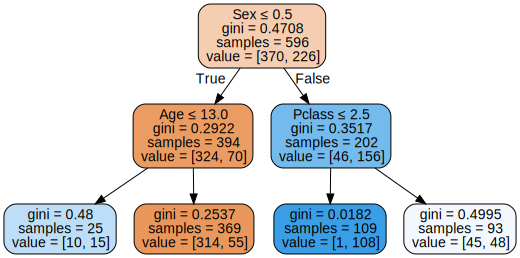

In [11]:
lm = DecisionTreeClassifier(max_depth=2)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support
print ("accuracy %2f" % model.score(X_test,y_test))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

# Decision trees for depth=3

testing training data

accuracy 0.847315


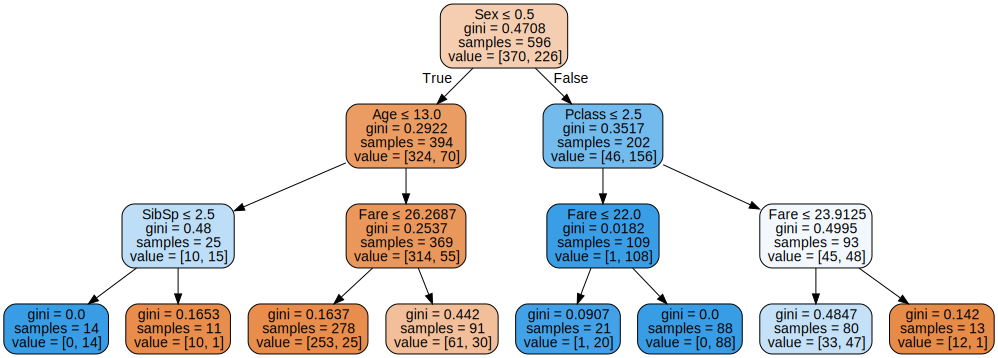

In [12]:
lm = DecisionTreeClassifier(max_depth=3)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)
print ("accuracy %2f" % model.score(X_train,y_train))
#print (precision_recall_fscore_support(data['Survived'],predict))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

testing test data


accuracy 0.796610


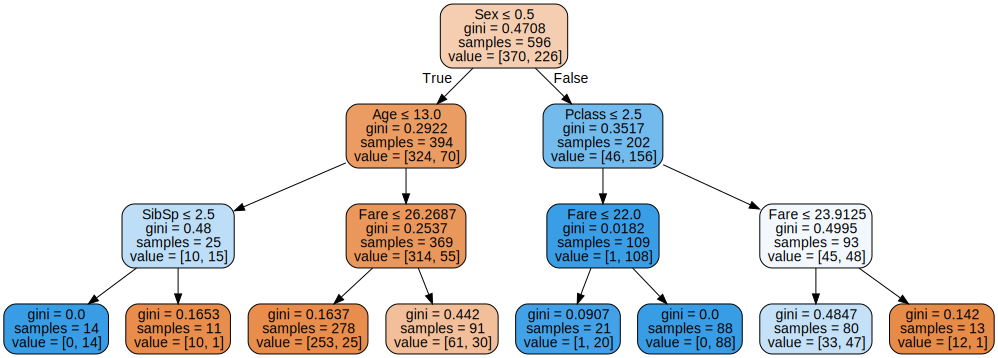

In [13]:
lm = DecisionTreeClassifier(max_depth=3)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support
print ("accuracy %2f" % model.score(X_test,y_test))
from sklearn import tree
import graphviz
tree_dot_data=tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)
graph

# decison tree with depth=4
Testing on training data

In [14]:

lm = DecisionTreeClassifier(max_depth=4)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)
print ("accuracy %2f" % model.score(X_train,y_train))
#print (precision_recall_fscore_support(data['Survived'],predict))


accuracy 0.857383


Testing on testing data

In [15]:
lm = DecisionTreeClassifier(max_depth=4)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)
print ("accuracy %2f" % model.score(X_test,y_test))

accuracy 0.786441


# decison tree with depth=5
Testing on training data

In [16]:
lm = DecisionTreeClassifier(max_depth=5)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)
print ("accuracy %2f" % model.score(X_train,y_train))

accuracy 0.867450


Testing on testing data

In [17]:
lm = DecisionTreeClassifier(max_depth=5)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)
print ("accuracy %2f" % model.score(X_test,y_test))

accuracy 0.769492


# decison tree with depth=6
Testing on training data

In [18]:
lm = DecisionTreeClassifier(max_depth=6)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_train)
print ("accuracy %2f" % model.score(X_train,y_train))

accuracy 0.895973


Testing on Testing data

In [19]:
lm = DecisionTreeClassifier(max_depth=6)
model = lm.fit(X_train,y_train)
predict = lm.predict(X_test)
print ("accuracy %2f" % model.score(X_test,y_test))

accuracy 0.776271


# Observations and Analysis

From the above experiments we observe the following things:

    Tree size train(Accu)  test(Accu)
 
    1          0.805369         0.749153
    
    2	       0.813758	       0.749153

    3	       0.847315	        0.79661

    4	       0.857383	        0.786441
       
    5	       0.86745	        0.769492
      
    6	       0.895973	        0.776271

1) Here for data makes sense as at:
     
       a)max-depth=1: The tree's graph shows 'Sex' as the most favorable feature for splitting and ends up in 394 females in one leaf node 202 females in other leaf[x==o denotes male and x==1 denotes female].So as per value of target Survival    0 = No, 1 = Yes.Thus,Out of 394 males 324 died and 70 survived, also out of 202 females 46 died and 156 survived. Thus, chances of survival of females are more than males

       b)max-Depth 2: The tree’s graph shows that first split attribute is ’Sex’ then is age and pClass. Out of 394 males 25 males where below age of 13 out of which only 15 survived, and 369 males who were above age of 13 among them 55 survived, so though males under 13 were less but more of them survived. On the other hand, out of 202 females, who were of higher class(pclass=1,2) had higher chance of survival(108 survived out of than females of lower class(48 survived out of 93)  

       c)max-Depth3: The tree’s graph is similar to what we saw in above where depth is 2 at depth three we see a attributes like Sibsp and fare.So males who were aged below 13 and whose number of sibling or spouses are more than 2 are less likely to survive(1 out of 11 survived) than those whose number of siblings or spouses were less(all 14 out of 14 survived).On the other hand males aged more than 13 who paid more than 26 are more likely to survive(30 out of 91 survived) than others(25 survived out of 278) this may be because they belong to higher class and placed on higher floors of ships so access to lifeguards was easy.
       For females of higher class(class 1,2) who paid more than 22 mostly all survived(all 88) and also who paid less than 22 survived(20 out of 21).whereas females of lower class(3) who paid less than 23 survived more (47 out of 80) than others(1out of 13).
     


2) Here we see that in almost all cases accuracy on training data is more than test data which is obvious as the data on which we are training is ought to get better trained by classifier thus giving higher accuracy.

3) With increase of tree depth/size the accuracies of:
    a)training is always increasing, as with the increase in depth of the the tree the complexity also increases that means data is more prone to overfit and thus variance is also increased. This is happeneing because when maximum depth is increased the tree will try to fit all possible values in training data generating unnecessary nodes and branches thus overfitting the training dataset and increasing the accuracy of training data with depth  
    
    b)and for test data its increasing before then it startis decreasing this is happening because the unnecessary branches made as explained above, the classifier will try to overfit the traning data and thus the accuray on test data will decrease after certain depth. Thats why with decision trees we try to prune trees after certain depth to check that they dont overfit the training data.

